In [5]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt
import PIL.Image as Image
import gym
import random
from matplotlib import image
from gym import Env, spaces
import time

# https://blog.paperspace.com/creating-custom-environments-openai-gym/

In [13]:
img = image.imread(r"cadaver_slice_160.png")

(0, 255)
(0, 1)


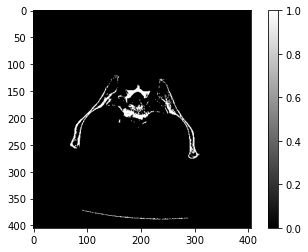

In [14]:
I = img
I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)

img = Image.fromarray(I8)
print(img.getextrema())
img = img.point(lambda p: p > 160)
print(img.getextrema())

plt.imshow(img, cmap ='gray')
plt.colorbar()
plt.show()


In [15]:
print(img.size)

(405, 405)


# Create Environment

In [17]:
class Center_FOV(Env):

    ACTION = ["UP", "DOWN"]

    def __init__(self):
        super(Center_FOV, self).__init__()

        # get image and threshold it. This will be the backgroud. 
        img = image.imread(r"cadaver_slice_160.png")
        I = img
        I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)

        img = Image.fromarray(I8)
        print(img.getextrema())
        img = img.point(lambda p: p > 160)
        

        # Define a 2-D observation space
        self.observation_shape = img.size

        # Going up and down? 
        self.observation_space = spaces.Box(low = np.zeros(self.observation_shape), 
                                            high = np.ones(self.observation_shape),
                                            dtype = np.float16)
    
        
        # Define an action space ranging from 0 to 4
        self.action_space = spaces.Discrete(2,)
                        
        # Create a canvas to render the environment images upon 
        self.canvas = img
        
        # Define elements present inside the environment
        self.elements = []
        


        # Permissible area of the FOV viewer to be 
        self.y_min = int (self.observation_shape[0] * 0.1)
        self.x_min = int (self.observation_shape[1] * 0.1)
        self.y_max = int (self.observation_shape[0] * 0.9)
        self.x_max = int (self.observation_shape[1] * 0.9)

# This is a class FOV Viewer, this will be determining the FOV and then calculating the total pixel values. 

In [1]:
class FOV_Viewer(object):
    def __init__(self, name, x_max, x_min, y_max, y_min):
        self.x = 0
        self.y = 0
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max
        self.name = name
    
    def set_position(self, x, y):
        self.x = self.clamp(x, self.x_min, self.x_max - self.FOV_w)
        self.y = self.clamp(y, self.y_min, self.y_max - self.FOV_h)
        
    
    def get_position(self):
        return (self.x, self.y)
    
    def move(self, del_x, del_y):
        self.x += del_x
        self.y += del_y
        
        self.x = self.clamp(self.x, self.x_min, self.x_max - self.FOV_w)
        self.y = self.clamp(self.y, self.y_min, self.y_max - self.FOV_h)

    def clamp(self, n, minn, maxn):
        return max(min(maxn, n), minn)

# This is the field of view of the image. 

In [18]:
class FOV_grabber(FOV_Viewer):
    def __init__(self, name, x_max, x_min, y_max, y_min):
        super(FOV_grabber, self).__init__(name, x_max, x_min, y_max, y_min)

        self.FOV_w = 10
        self.FOV_h = 10
        self.current_FOV = self.canvas[self.x:self.x+self.FOV_w, self.y:self.y+self.FOV_h]

def draw_elements_on_canvas(self):
    # Init the canvas 
     # get image and threshold it. This will be the backgroud. 
        img = image.imread(r"cadaver_slice_160.png")
        I = img
        I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)

        img = Image.fromarray(I8)
        print(img.getextrema())
        img = img.point(lambda p: p > 160)
        

In [ ]:
# Not necessary???

def draw_elements_on_canvas(self):
    # Init the canvas 
    img = image.imread(r"cadaver_slice_160.png")
    I = img
    I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)

    img = Image.fromarray(I8)
    print(img.getextrema())
    img = img.point(lambda p: p > 160)


    # draw the bounding box on the canvas. 


In [ ]:
def reset(self):

    # Reset the reward
    self.ep_return  = 0

    # Reset the Canvas 
    img = image.imread(r"cadaver_slice_160.png")
    I = img
    I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)

    img = Image.fromarray(I8)
    print(img.getextrema())
    img = img.point(lambda p: p > 160)


    # Determine a place to intialise the chopper in
    x = random.randrange(int(self.observation_shape[0] * 0.05), int(self.observation_shape[0] * 0.10))
    y = random.randrange(int(self.observation_shape[1] * 0.15), int(self.observation_shape[1] * 0.20))

    # Intialise the chopper
    self.grabber = FOV_grabber("FOV_Grabber", self.x_max, self.x_min, self.y_max, self.y_min)
    self.grabber.set_position(x,y)


    # return the observation
    return self.canvas 